# **Stroke Prediction Using Exploratory Data Analysis and Machine Learning**

#### *Project Introduction*

Stroke is one of the most critical health issues globally, ranking as the second leading cause of death according to the World Health Organization (WHO), responsible for approximately 11% of total deaths worldwide. Early detection of individuals at high risk for stroke can significantly improve medical outcomes, reduce healthcare costs, and save lives.

This project focuses on predicting the likelihood of a stroke based on a variety of patient attributes using Exploratory Data Science (EDS) and Machine Learning (ML) techniques. By analyzing factors such as age, gender, medical history, lifestyle habits, and health metrics, this project aims to uncover patterns and relationships that contribute to stroke risk.

The dataset used for this project includes key attributes such as age, hypertension, heart disease, BMI, average glucose level, marital status, work type, and smoking habits. Through systematic analysis and predictive modeling, this project will provide insights into the factors influencing stroke occurrences and develop a tool that can aid in early diagnosis and preventive healthcare strategies.

The overarching goal is to create a robust prediction model that healthcare providers can leverage to identify high-risk individuals and take proactive measures to mitigate the chances of a stroke.

### *_GETTING STARTED!!_*

#### *_Exploratory Data Analysis_*

##### *_Importing Libraries_*

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import os

##### *_Read Dataset_*

In [3]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##### *_Checking and Substituting Null Values_*

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df['bmi']=df['bmi'].interpolate()

In [7]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

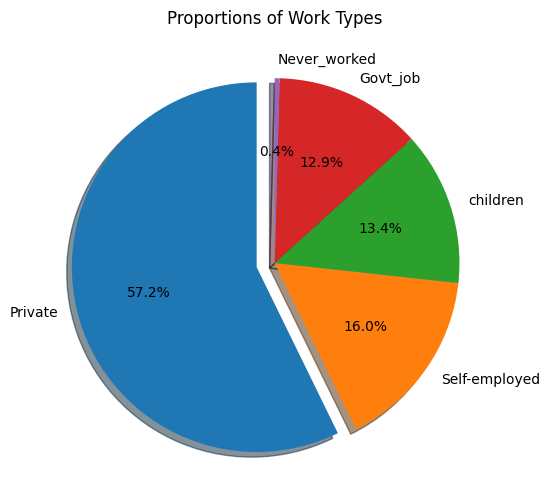

In [9]:
dfworktype=df['work_type']

count=dfworktype.value_counts()
explode = [0.1 if i == 0 else 0 for i in range (len(count))]
plt.figure(figsize=(10,6))
plt.pie(count,labels=count.index,autopct='%1.1f%%', startangle=90,shadow=True,explode=explode)
plt.title('Proportions of Work Types')
plt.show()

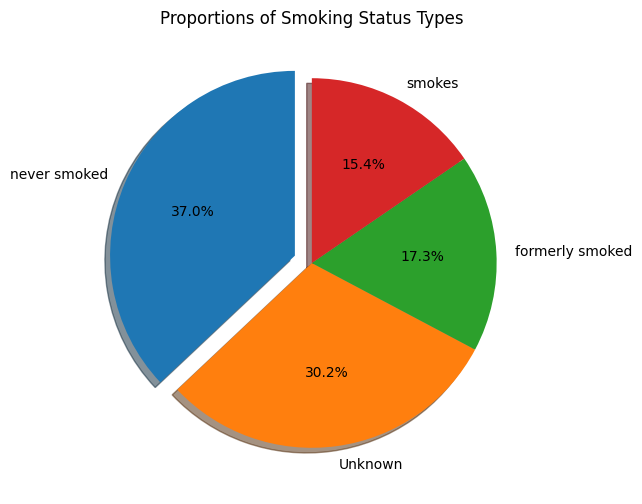

In [10]:
dfsmoketype=df['smoking_status']

count=dfsmoketype.value_counts()
explode = [0.1 if i == 0 else 0 for i in range (len(count))]
plt.figure(figsize=(10,6))
plt.pie(count,labels=count.index,autopct='%1.1f%%', startangle=90,shadow=True,explode=explode)
plt.title('Proportions of Smoking Status Types')
plt.show()

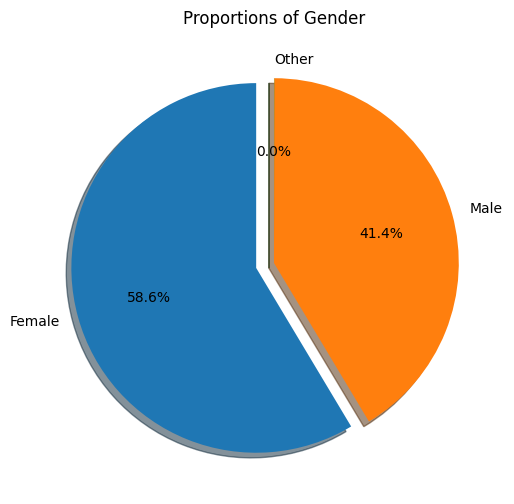

In [11]:
dfsmoketype=df['gender']

count=dfsmoketype.value_counts()
explode = [0.1 if i == 0 else 0 for i in range (len(count))]
plt.figure(figsize=(10,6))
plt.pie(count,labels=count.index,autopct='%1.1f%%', startangle=90,shadow=True,explode=explode)
plt.title('Proportions of Gender')
plt.show()

C:\Users\vaibh\AppData\Local\Temp\ipykernel_26780\4142964519.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='stroke', data=df, palette=['green', 'red'])


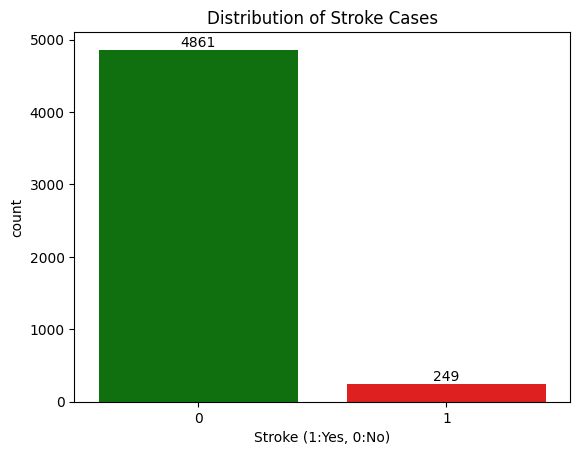

In [42]:
ax = sns.countplot(x='stroke', data=df, palette=['green', 'red'])

for container in ax.containers:
    for bar in container:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                int(bar.get_height()), ha='center', va='bottom')

plt.title('Distribution of Stroke Cases')
plt.xlabel('Stroke (1:Yes, 0:No)')
plt.show()

C:\Users\vaibh\AppData\Local\Temp\ipykernel_26780\3104620327.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='ever_married', data=df, palette='colorblind')


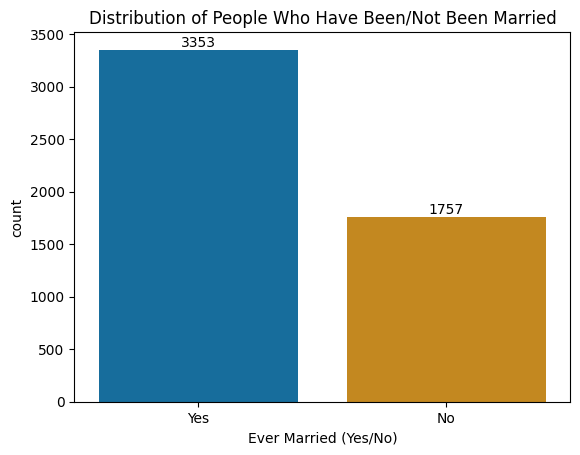

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x='ever_married', data=df, palette='colorblind')

for container in ax.containers:
    for bar in container:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                int(bar.get_height()), ha='center', va='bottom')

plt.title('Distribution of People Who Have Been/Not Been Married')
plt.xlabel('Ever Married (Yes/No)')
plt.show()

C:\Users\vaibh\AppData\Local\Temp\ipykernel_26780\1573952837.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='gender', data=df, palette='colorblind')


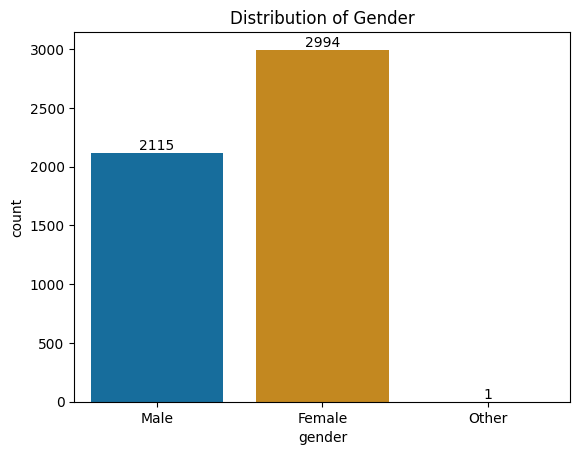

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x='gender', data=df, palette='colorblind')

for container in ax.containers:
    for bar in container:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                int(bar.get_height()), ha='center', va='bottom')

plt.title('Distribution of Gender')
plt.show()


<Axes: title={'center': 'Correlation Map'}>

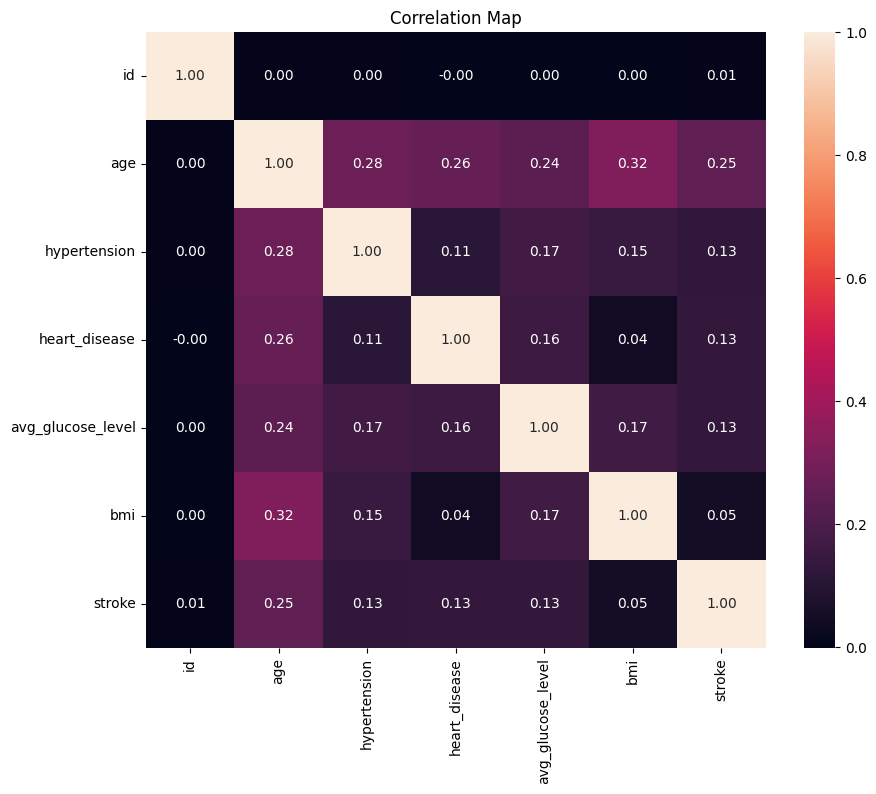

In [24]:
number = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
plt.title("Correlation Map")
sns.heatmap(number.corr(),annot=True, fmt='.2f')

The heatmap provides a visual representation of the relationships between different variables in the dataset.

We observe a moderate positive correlation between age and variables like hypertension, heart disease, glucose level, and BMI.

The stroke variable shows weak correlations with most other variables, suggesting that its occurrence might be influenced by a combination of factors.

There are some positive correlations between hypertension, heart disease, and glucose level, indicating potential connections between these health conditions.

BMI appears to have a moderate positive correlation with age but weaker relationships with other variables.

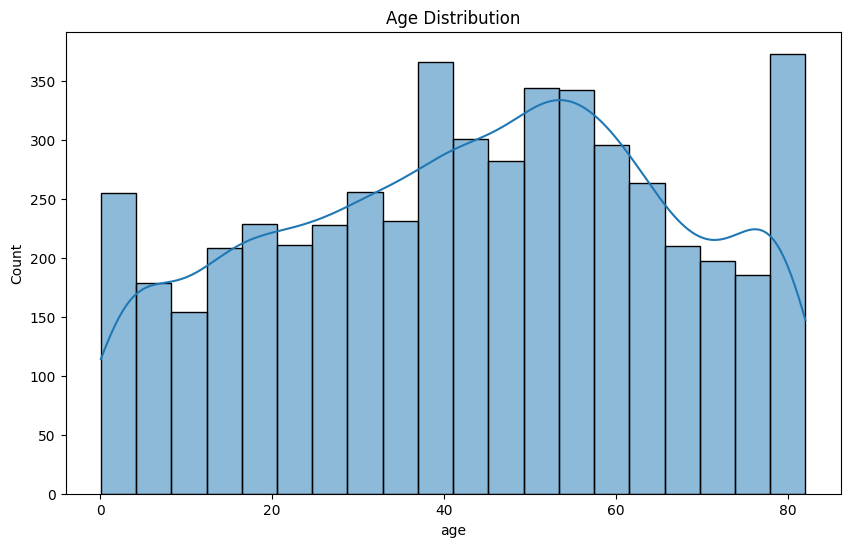

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="age", kde=True)
plt.title('Age Distribution')
plt.show()

The histogram shows the distribution of ages in the dataset. The majority of individuals are between 30 and 60 years old, with a peak around 40-50 years. A slight right skew is observed, indicating a longer tail towards older ages.

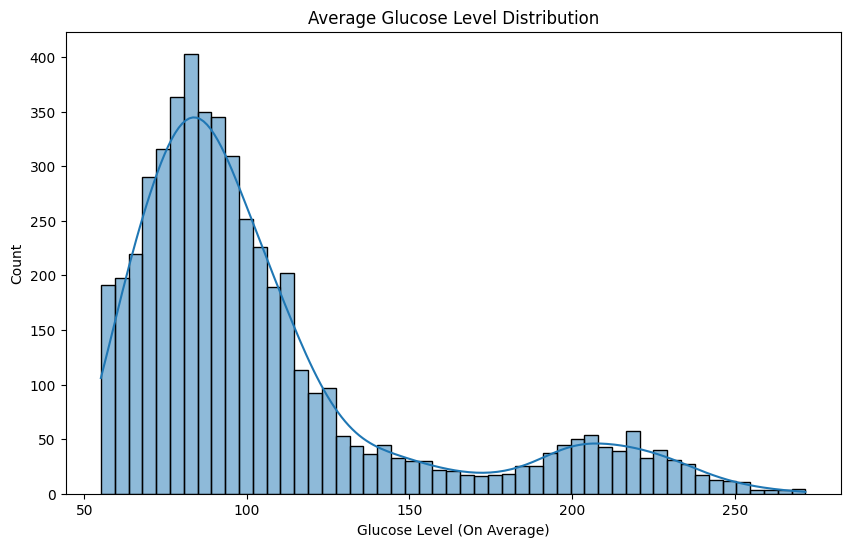

In [46]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="avg_glucose_level", kde=True)
plt.title('Average Glucose Level Distribution')
plt.xlabel('Glucose Level (On Average)')
plt.show()

The distribution of average glucose levels is right-skewed, with a peak around 80-120 mg/dL. This indicates that most individuals have relatively normal glucose levels, while a smaller portion has higher levels. The presence of a long tail towards higher glucose levels suggests the existence of a subpopulation with elevated glucose levels, potentially indicating a higher risk of diabetes or other health issues.

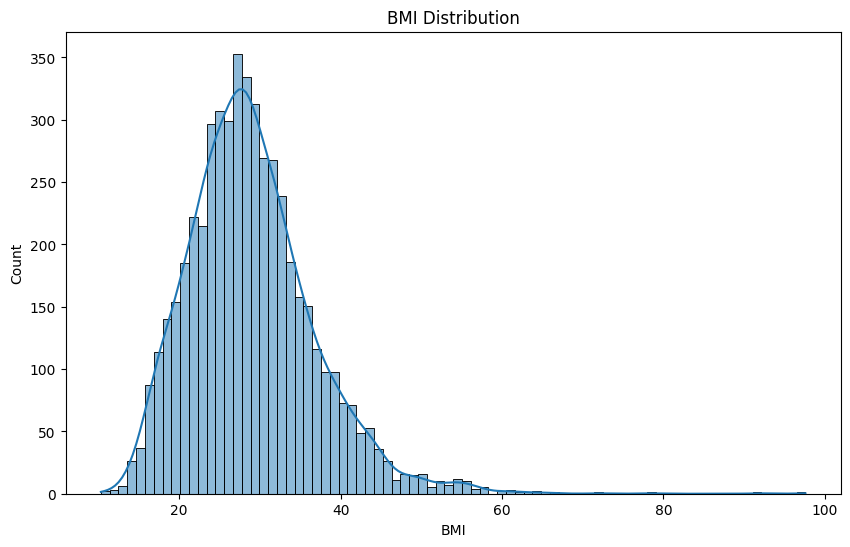

In [47]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="bmi", kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.show()

The BMI distribution is positively skewed, with a peak around 25-30 kg/m². This indicates that a significant portion of the population falls within the normal weight range. However, the long tail towards higher BMI values suggests the presence of individuals with overweight and obesity, potentially indicating a higher risk of associated health problems.

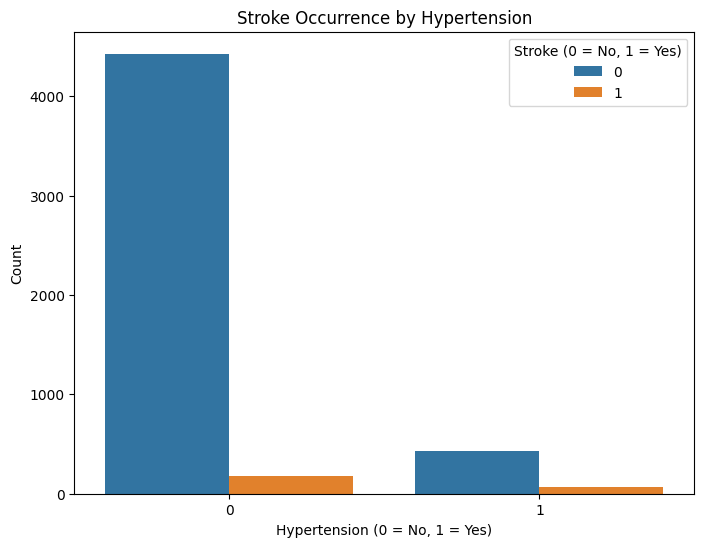

In [48]:
plt.figure(figsize=(8, 6))

sns.countplot(x='hypertension', hue='stroke', data=df)

plt.title('Stroke Occurrence by Hypertension')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Stroke (0 = No, 1 = Yes)')

plt.show()

The plot illustrates the relationship between hypertension and stroke occurrence. It shows that a significantly larger number of individuals without hypertension did not experience a stroke. However, among those with hypertension, a higher proportion experienced a stroke compared to those without hypertension. This suggests that hypertension is a risk factor for stroke.

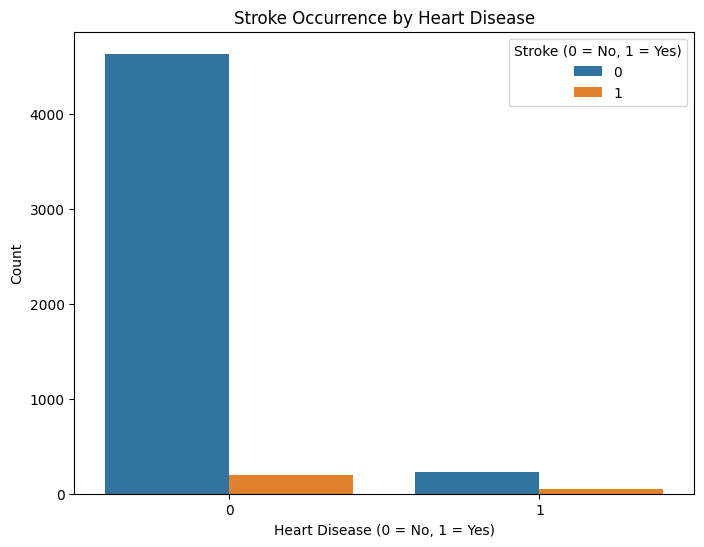

In [49]:
plt.figure(figsize=(8, 6))

sns.countplot(x='heart_disease', hue='stroke', data=df)

plt.title('Stroke Occurrence by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Stroke (0 = No, 1 = Yes)')


plt.show()

A significantly larger number of individuals without heart disease did not experience a stroke. However, among those with heart disease, a higher proportion experienced a stroke compared to those without heart disease. This suggests that heart disease is also a risk factor for stroke.

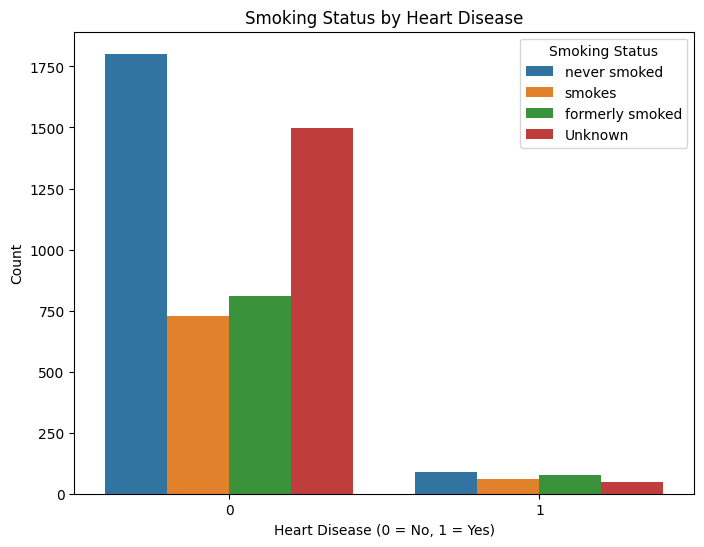

In [50]:
plt.figure(figsize=(8, 6))

sns.countplot(x='heart_disease', hue='smoking_status', data=df)

plt.title('Smoking Status by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Smoking Status')


plt.show()

The indivisuals who have smoked or currently smoke, there is a higher proportion of individuals with heart disease compared to those who have never smoked. This suggests that smoking might be a risk factor for heart disease.

C:\Users\vaibh\AppData\Local\Temp\ipykernel_26780\663318025.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_smoking = df.groupby(['age_group', 'smoking_status']).size().unstack()


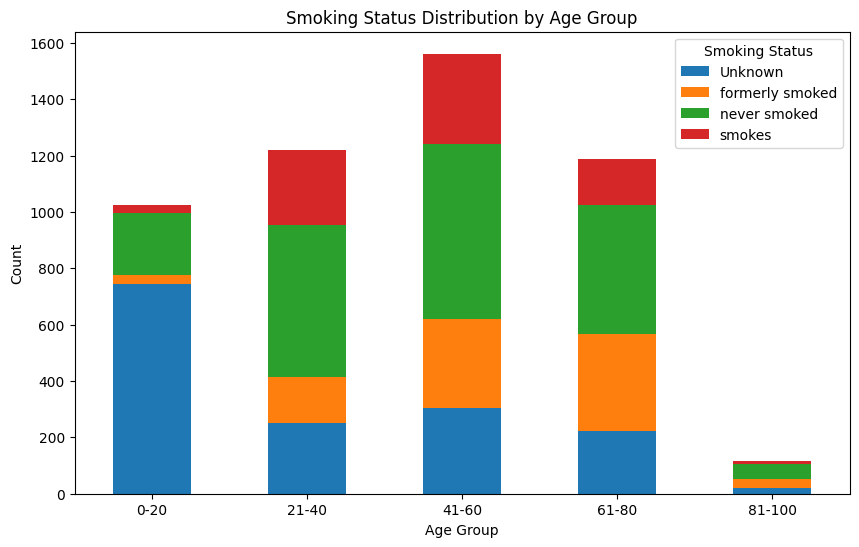

In [51]:
age_bins = [0, 20, 40, 60, 80, 100] 
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

age_smoking = df.groupby(['age_group', 'smoking_status']).size().unstack()

age_smoking.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Smoking Status Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Smoking Status')
plt.xticks(rotation=0)


plt.show()

The stacked bar chart illustrates the distribution of smoking status across different age groups. We observe a decrease in current smokers with increasing age, while the proportion of never smokers increases. Former smokers remain relatively consistent across age groups. The "Unknown" category likely represents missing data. This suggests a positive trend towards reduced smoking prevalence over time.

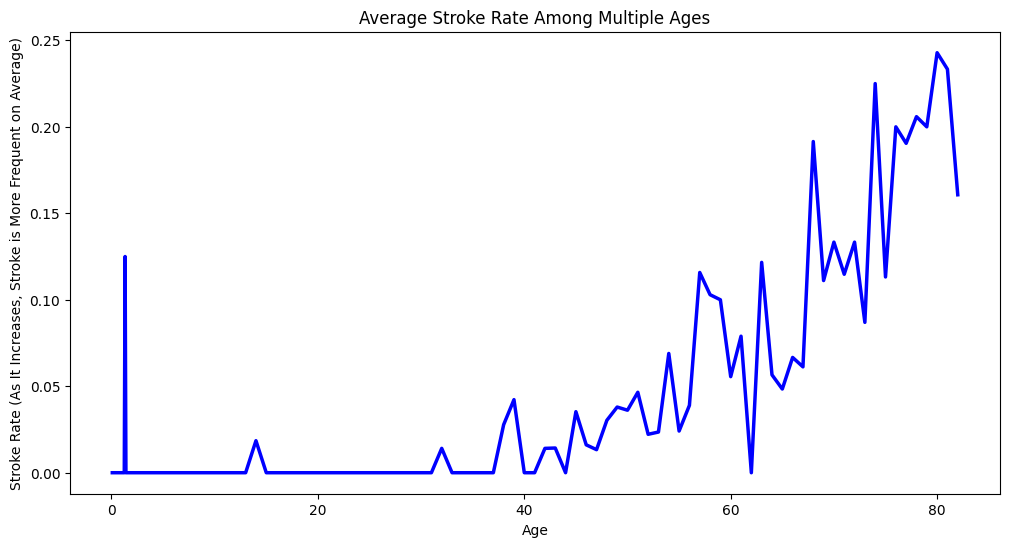

In [53]:
age_stroke_rate = df.groupby('age')['stroke'].mean().reset_index()
plt.figure(figsize = (12,6))
sns.lineplot(x = "age", y = "stroke",data = age_stroke_rate,color="blue",linewidth = 2.5,dashes = False)
plt.title('Average Stroke Rate Among Multiple Ages')
plt.xlabel('Age')
plt.ylabel('Stroke Rate (As It Increases, Stroke is More Frequent on Average)')
plt.show()

We observe a general trend of increasing stroke risk with age, particularly after the age of 40. However, there are some fluctuations and spikes in the curve, suggesting that other factors besides age might influence stroke risk. The sharp increase in stroke rate around age 80 highlights the significantly higher risk for older individuals.

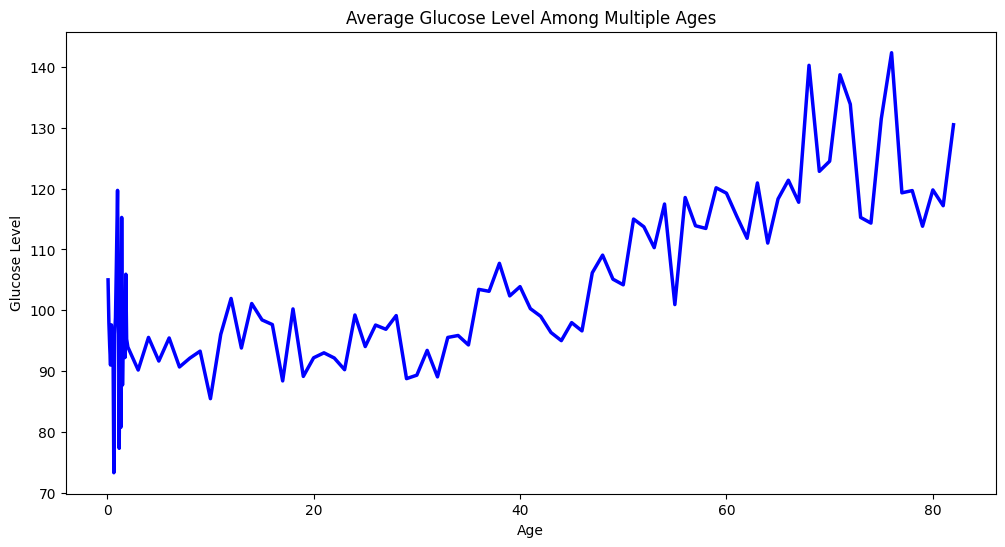

In [55]:
age_gluc_rate = df.groupby('age')['avg_glucose_level'].mean().reset_index()
plt.figure(figsize = (12,6))
sns.lineplot(x = "age", y = "avg_glucose_level",data = age_gluc_rate,color="blue",linewidth = 2.5,dashes = False)
plt.title('Average Glucose Level Among Multiple Ages')
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.show()

Higher glucose levels, particularly in the older age groups, can increase the risk of various health complications, including diabetes. Individuals with diabetes are at a higher risk of stroke due to factors like damage to blood vessels and increased blood clotting. Therefore, the observed trend in increasing glucose levels with age suggests a potential correlation between higher glucose levels and increased stroke risk. 

C:\Users\vaibh\AppData\Local\Temp\ipykernel_26780\1529974980.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke',y='bmi',data=df, palette= 'colorblind')


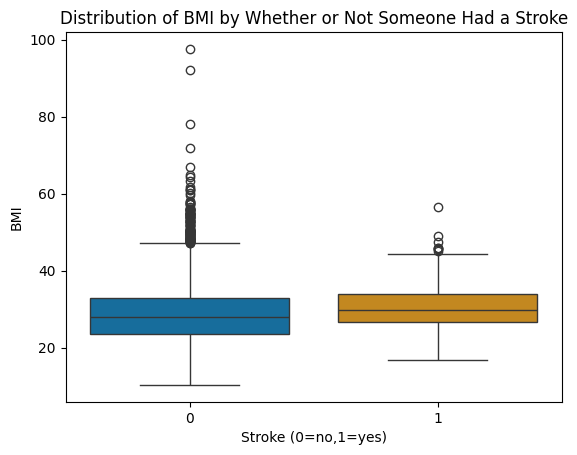

In [59]:
sns.boxplot(x='stroke',y='bmi',data=df, palette= 'colorblind')
plt.title('Distribution of BMI by Whether or Not Someone Had a Stroke')
plt.xlabel('Stroke (0=no,1=yes)')
plt.ylabel('BMI')
plt.show()

The box plot shows that individuals who have had a stroke tend to have slightly higher median BMI compared to those who haven't.

C:\Users\vaibh\AppData\Local\Temp\ipykernel_26780\2406646341.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke',y='age',data=df, palette='colorblind')


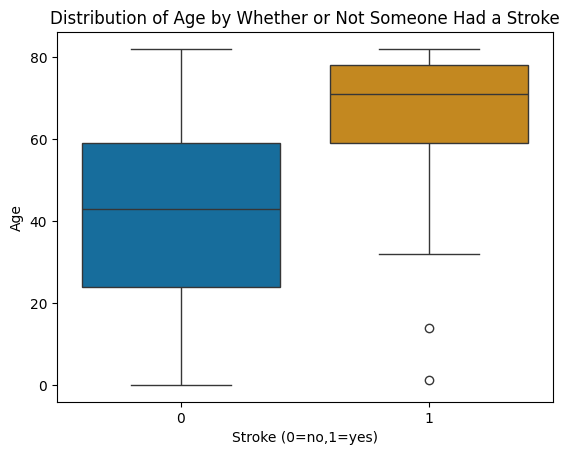

In [62]:
sns.boxplot(x='stroke',y='age',data=df, palette='colorblind')
plt.title('Distribution of Age by Whether or Not Someone Had a Stroke')
plt.xlabel('Stroke (0=no,1=yes)')
plt.ylabel('Age')
plt.show()

A clear difference in age distribution between individuals who have had a stroke and those who haven't. People who have experienced a stroke tend to be significantly older, with a higher median age and a wider range of ages compared to those who haven't had a stroke. This suggests that age is a strong risk factor for stroke.

#### _*ML Modelling*_

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [78]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import pandas as pd

# Drop irrelevant columns
df = df.drop(['id'], axis=1, errors='ignore')  # Drop 'id' column if present

# Handle 'gender' column
df['gender'] = df['gender'].astype(str).str.strip()  # Convert to string and remove leading/trailing spaces
df['gender'] = df['gender'].replace(['Other'], np.nan)  # Treat 'Other' as missing
df['gender'] = df['gender'].fillna('Female')  # Replace missing values with mode
df['gender'] = LabelEncoder().fit_transform(df['gender'])  # Encode to numeric

# Ensure all columns with numeric data are converted to the appropriate numeric type
# Convert columns to numeric if they are not already
df = df.apply(pd.to_numeric, errors='ignore')

# Fill missing values in numeric columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())  # Replace NaN with median

# Separate features and target
X = df.drop('stroke', axis=1, errors='ignore')  # Independent variables
y = df['stroke']  # Target variable

# Ensure that X only contains numeric columns before scaling
X_numeric = X.select_dtypes(include=['float64', 'int64'])

# Scale numerical features
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Convert the scaled numeric values back into a DataFrame with the same column names
X_scaled_df = pd.DataFrame(X_numeric_scaled, columns=X_numeric.columns)

# Replace the scaled columns in the original DataFrame
X[X_numeric.columns] = X_scaled_df

# Final data summary
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: (5110, 16)
y shape: (5110,)


C:\Users\vaibh\AppData\Local\Temp\ipykernel_26780\1087281880.py:16: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [84]:
from sklearn.preprocessing import LabelEncoder

# Convert 'age_group' to numeric labels using LabelEncoder
age_group_encoder = LabelEncoder()
X['age_group'] = age_group_encoder.fit_transform(X['age_group'].astype(str))

In [85]:
# Convert boolean columns to int (0 or 1)
bool_columns = [
    'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed',
    'work_type_children', 'Residence_type_Urban', 'smoking_status_formerly smoked',
    'smoking_status_never smoked', 'smoking_status_smokes'
]

X[bool_columns] = X[bool_columns].astype(int)

In [86]:
# Fill missing values in numeric columns with median
X = X.fillna(X.median())

# If there are missing values in categorical columns (age_group), fill with the mode
X['age_group'] = X['age_group'].fillna(X['age_group'].mode()[0])

In [87]:
# Check the data types after transformations
print(X.dtypes)

gender                              int32
age                               float64
hypertension                      float64
heart_disease                     float64
avg_glucose_level                 float64
bmi                               float64
age_group                           int32
ever_married_Yes                    int32
work_type_Never_worked              int32
work_type_Private                   int32
work_type_Self-employed             int32
work_type_children                  int32
Residence_type_Urban                int32
smoking_status_formerly smoked      int32
smoking_status_never smoked         int32
smoking_status_smokes               int32
dtype: object


In [88]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (4088, 16)
X_test shape: (1022, 16)
y_train shape: (4088,)
y_test shape: (1022,)


In [89]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model on the training data
logreg_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [90]:
# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the accuracy of the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy: {accuracy_logreg:.4f}")

# Detailed performance evaluation
report_logreg = classification_report(y_test, y_pred_logreg)
print("Classification Report:")
print(report_logreg)

# Confusion matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix:")
print(conf_matrix_logreg)

Accuracy: 0.9393
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Confusion Matrix:
[[960   0]
 [ 62   0]]


C:\Users\vaibh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vaibh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vaibh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

##### *High Accuracy for Class 0 (No Stroke):* The model demonstrated excellent performance for the majority class, achieving an accuracy of 94% overall, with perfect recall (1.00) for class 0 (no stroke).

##### *Strong Precision for Class 0:* The model correctly predicted 94% of the "no stroke" cases, demonstrating strong precision for the majority class.

##### *Balanced Approach for Majority Class:* The model successfully identified all instances of "no stroke," as indicated by the high recall and F1-score for class 0.

##### *High Weighted Average Performance:* The weighted average F1-score (0.91) reflects good overall performance due to the model's focus on the majority class.








# **Thank You!!**